In [2]:
import os
import pandas as pd

In [3]:
data_dir='./data_kantar/'
os.listdir(data_dir)

['Datos_2022.csv',
 'Explicacion_VariablesV3.xlsx',
 'Explicacion_VariablesV2.xlsx',
 'Explicacion_VariablesV3.numbers',
 'eng_re_typed.csv',
 'Carrefour_2019_2020_2021_prepared2_02_11_2023.dta',
 're_typed.csv']

In [4]:
read_able_columns = pd.read_excel(data_dir+'Explicacion_VariablesV3.xlsx', engine='openpyxl')


In [34]:
type_dict=dict(zip(read_able_columns['Variable'].str.strip(),read_able_columns['Tipo Variable'].str.strip()))
type_translation={'ID':'int64','Fecha':'datetime','Numérica':'int64','Categórica':'category','Dicotómica':'bool'}   

In [35]:
type_dict_new ={ k:type_translation[v] for k,v in type_dict.items() }


In [36]:
type_dict_new={('X'+k if k[0].isdigit() else k):v for k,v in type_dict_new.items() }
type_dict_new['CodigoBarras']='str'
del type_dict_new['FechaCesta']


In [37]:
read_able_columns['description']=read_able_columns['Explicación'].apply(lambda x: x.split(' of the purchased product')[0].strip().replace(' ','_'))

In [38]:
replacing_values= dict(zip(read_able_columns['Variable'],read_able_columns['Explicación']))


In [59]:
source_df_test=pd.read_csv(data_dir+'Datos_2022.csv',#nrows=1000,
                           encoding = "ISO-8859-1", delimiter=";" ,error_bad_lines=False, parse_dates=['FechaCesta'])

/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (28,42,45,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
source_df_test.loc[source_df_test['Presencia_Niños'].str.contains('No'),'Presencia_Niños']=0

In [41]:
source_df_test.columns



Index(['idCompra', 'CodPanelista', 'CodProducto', 'CodigoBarras', 'FechaCesta',
       'PrecioCompra', 'Cantidad', 'Precio', 'CodLugarCompra', 'Lugar_Compra',
       'Canal', 'CodIndividuo', 'CC_AA', 'Edad_Ama', 'NF', 'Numero_Gatos',
       'Numero_Perros', 'Presencia_Niños', 'CodIMC', 'IMC', 'Ponderacion',
       'CodVF', 'VF', 'SA7_BPL', 'SA4_Fabricante', 'SA3_Marca', 'SA2_Submarca',
       'X102_Aditivos', 'X108_Usuario', 'X109_Estado', 'X112_Niv_Calorias',
       'X124_Estilo', 'X127_Tipo_Bañado_Choc', 'X129_Tipo_Pasteleria',
       'X135_Uso', 'X143_Tipo_Corte', 'X163_Info_Cafeina',
       'X167_Grado_Curacion', 'X169_Cont_Materia_Grasa', 'X174_Despiece.Corte',
       'X182_Tipo_Queso', 'X188_Tipo_Pan', 'X189_Tipo_Viena',
       'X206_Tipo_Pescado', 'X230_Niv_Concentracion',
       'X314_Tipo_Cena.Entrante', 'X315_Tipo_Carne', 'X323_Tipo_Sazonamiento',
       'X328_Tipo_Aceite', 'X329_Pureness_Niveau', 'X360_Tipo_Verdura',
       'X366_Tipo_Postre', 'X383_Tipo_Yogurt', 'X384_Tipo_

### Reset types

In [33]:
#source_df_test.astype(type_dict_new)
'''
for k,v in type_dict_new.items():
    print(k.strip(),v)
    source_df_test.astype({k.strip():v})
'''

idCompra int64
CodProducto int64
CodigoBarras str
PrecioCompra int64
Cantidad int64
Precio int64
CodLugarCompra int64
Lugar_Compra category
Canal category
CodPanelista int64
CodIndividuo category
CC_AA category
Ciclo_Vida category
Clase_EGM category
Clase_Social category
Edad_Ama int64
Habitat_Metropolitano category
Habitat_Municipal_Std category
Inmigrante bool
NF category
Numero_Gatos category
Numero_Perros int64
Presencia_Niños int64
Provincia category
Region category
CodIMC category
IMC category
Ponderacion int64
CodVF category
VF category
SA7_BPL bool
SA4_Fabricante category
SA3_Marca category
SA2_Submarca category
X102_Aditivos category
X108_Usuario category
X109_Estado category
X112_Niv_Calorias category
X124_Estilo category
X127_Tipo_Bañado_Choc category
X129_Tipo_Pasteleria category
X135_Uso category
X143_Tipo_Corte category
X163_Info_Cafeina category
X167_Grado_Curacion category
X169_Cont_Materia_Grasa category
X174_Despiece.Corte category
X182_Tipo_Queso category
X188_Tipo_P

In [62]:
type_dict_new['Presencia_Niños']='category'

source_df_test=source_df_test.astype(type_dict_new)

In [14]:
#source_df_test.to_csv(data_dir+'re_typed.csv')


In [15]:
#source_df= pd.read_csv(data_dir+'re_typed.csv')

In [16]:
#source_df.rename(columns=replacing_values)
#source_df.to_csv(data_dir+'eng_re_typed.csv')


In [17]:
#replacing_values

In [18]:
import numpy as np

In [19]:
#source_df=pd.read_csv(data_dir+'eng_re_typed.csv')
#source_df=pd.read_csv(data_dir+'re_typed.csv')


In [43]:
source_df_test.dtypes

idCompra                  int64
CodPanelista              int64
CodProducto               int64
CodigoBarras             object
FechaCesta       datetime64[ns]
                      ...      
Inmigrante                 bool
Provincia              category
Region                 category
promo_folleto          category
promo_envase           category
Length: 88, dtype: object

In [44]:
#source_df_test.select_dtypes(include=np.number)

In [396]:
source_df_test.head(100)


,idCompra,CodPanelista,CodProducto,CodigoBarras,FechaCesta,PrecioCompra,Cantidad,Precio,CodLugarCompra,Lugar_Compra,...,Clase_EGM,Clase_Social,Habitat_Metropolitano,Habitat_Municipal_Std,Inmigrante,Provincia,Region,promo_folleto,promo_envase,price_per_unit
0,191945938,364917,791031,8480000105424,2022-12-12,1650,12000,1716,79,Mercadona,...,Media,Media,AM Madrid,más 1000000,True,Madrid,MDD AM,NaN,NaN,0.143000
1,190744241,30109,675179,8410702020886,2022-11-06,400,2000,400,28,CONDIS,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.200000
2,182162741,30109,204305,SSA1410202,2022-01-20,2088,445,56,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.125843
3,189827808,30109,204305,SSA1410202,2022-10-09,1071,625,87,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.139200
4,182203652,30109,204305,SSA1410202,2022-01-12,969,935,83,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.088770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,183559928,30109,209952,8480017269966,2022-02-09,540,2000,106,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.053000
96,183420841,30109,209952,8480017269966,2022-02-05,791,3000,159,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.053000
97,183215414,30109,209952,8480017269966,2022-02-17,3631,3000,159,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.053000
98,182944041,30109,279449,8480017377760,2022-02-17,3631,1000,22,33,DIA,...,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN,0.022000


In [29]:
source_df_test.to_excel(data_dir+'retyped.xlsx')

In [46]:
# grouping prices per date and shop - regression, find outliers
#or shop type , if there is an action
#source_df_test['promo']= source_df_test['Promo_Folleto'] | source_df_test['Promo_Envase'] |source_df_test['Promo_TPR']

In [52]:
#grouped.first()

,,,idCompra,CodPanelista,CodigoBarras,FechaCesta,PrecioCompra,Cantidad,Precio,Lugar_Compra,Canal,CodIndividuo,...,Ciclo_Vida,Clase_EGM,Clase_Social,Habitat_Metropolitano,Habitat_Municipal_Std,Inmigrante,Provincia,Region,promo_folleto,promo_envase
CodProducto,CodLugarCompra,promo,,,,,,,,,,,,,,,,,,,,,
348,79,True,190848708,30109,8480000712677,2022-10-26,5210,1000,70,Mercadona,SUPER+AUTOS,0,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
405,33,True,191834820,30109,8480017246011,2022-11-16,826,1000,139,DIA,DISCOUNT,0,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
3010,79,True,188918604,30109,E8A11302010304650208,2022-08-27,3485,1814,1633,Mercadona,SUPER+AUTOS,1,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
3121,79,True,184445331,30109,E8A11404010304650208,2022-03-02,8437,416,318,Mercadona,SUPER+AUTOS,0,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
4058,79,True,193139703,30109,8480000431127,2022-12-14,8555,1000,260,Mercadona,SUPER+AUTOS,0,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976644,131,True,187936769,30109,SSA1590202,2022-06-24,1478,1160,302,FRUTERIA,FRUTERIA/VERDULERIA,1,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
976847,79,True,187656511,30109,TCA203,2022-06-21,4803,296,129,Mercadona,SUPER+AUTOS,1,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN
980962,33,True,183689993,30109,8436040903049,2022-02-25,2262,1000,139,DIA,DISCOUNT,0,...,Parejas Adultas sin hijos,Media Alta,Media,No Metrop,20001 a 30000,True,Jaen,Andalucia,NaN,NaN


In [480]:
dev_df = source_df_test.head(3000).copy()

In [76]:
#dfupdate= dev_df.sample(100)

In [77]:
#dfupdate['Precio']*=2

In [78]:
#dev_df.update(dfupdate)

In [647]:

def price_outlier(df):
    
    df['outlier'] = (
        df.groupby(['CodProducto','CodLugarCompra', pd.Grouper(key='FechaCesta',freq='7D')])['price_per_unit']
        .assign(mode=lambda x: x.mode()).transform(lambda x: x!=x.mode().iloc[0])
        )  
    

def price_outlier1(df):
    
    df['mode'] = (
        df.assign(date=df['FechaCesta']).groupby(['CodProducto','CodLugarCompra', pd.Grouper(key='FechaCesta',freq='7D')])['price_per_unit']
        .apply(lambda x: (x.mode().iloc[0])).reset_index()
        )  
    df['outlier']=df['mode']!=df['price_per_unit']
    return df
    
# https://stackoverflow.com/questions/30718231/aggregating-in-pandas-groupby-using-lambda-functions    

def price_mode(arr):
    return arr.mode().iloc[0]
def identity(arr):
    return arr.apply(lambda x: x)
    
def price_outlier2(df):
    #df['price_per_unit1']=df['price_per_unit']
    #df['FechaCesta']= df['FechaCesta'].astype('datetime64[ns]')
    #df['FechaCesta'] = pd.to_datetime(df['FechaCesta'], utc = True)
    
    grouped= df.groupby(['CodProducto','CodLugarCompra', pd.Grouper(key='FechaCesta',freq='7D')],as_index=False).agg(
                mode=('price_per_unit',price_mode)#,
                #FechaCesta=('FechaCesta',lambda x:set(x.astype('datetime64[ns]')))
            ).reset_index()
    #grouped['FechaCesta']=grouped['FechaCesta'].apply(lambda x: pd.to_datetime(pd.Timestamp(x)))

    df=pd.merge(df,grouped,on=['CodProducto','CodLugarCompra','FechaCesta'])
    #df=df.merge(grouped ,on=['CodProducto','CodLugarCompra','FechaCesta']  )
    df['outlier']=df['mode']!=df['price_per_unit']
    return df


In [648]:

dev_df1=price_outlier2(dev_df)

KeyError: 'FechaCesta'

In [636]:
dev_df['FechaCesta'].unique()


array(['2022-12-12T00:00:00.000000000', '2022-11-06T00:00:00.000000000',
       '2022-01-20T00:00:00.000000000', '2022-10-09T00:00:00.000000000',
       '2022-01-12T00:00:00.000000000', '2022-02-25T00:00:00.000000000',
       '2022-12-22T00:00:00.000000000', '2022-11-16T00:00:00.000000000',
       '2022-09-15T00:00:00.000000000', '2022-12-11T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-17T00:00:00.000000000', '2022-07-23T00:00:00.000000000',
       '2022-11-25T00:00:00.000000000', '2022-08-03T00:00:00.000000000',
       '2022-09-28T00:00:00.000000000', '2022-02-05T00:00:00.000000000',
       '2022-10-01T00:00:00.000000000', '2022-06-29T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-12-29T00:00:00.000000000',
       '2022-05-28T00:00:00.000000000', '2022-11-26T00:00:00.000000000',
       '2022-11-03T00:00:00.000000000', '2022-07-13T00:00:00.000000000',
       '2022-03-02T00:00:00.000000000', '2022-12-14

In [635]:
dev_df1['FechaCesta'].unique()

array(['2022-12-12T00:00:00.000000000', '2022-11-06T00:00:00.000000000',
       '2022-01-20T00:00:00.000000000', '2022-10-09T00:00:00.000000000',
       '2022-01-12T00:00:00.000000000', '2022-02-25T00:00:00.000000000',
       '2022-12-22T00:00:00.000000000', '2022-11-16T00:00:00.000000000',
       '2022-09-15T00:00:00.000000000', '2022-12-11T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-17T00:00:00.000000000', '2022-07-23T00:00:00.000000000',
       '2022-11-25T00:00:00.000000000', '2022-08-03T00:00:00.000000000',
       '2022-09-28T00:00:00.000000000', '2022-02-05T00:00:00.000000000',
       '2022-10-01T00:00:00.000000000', '2022-06-29T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-12-29T00:00:00.000000000',
       '2022-05-28T00:00:00.000000000', '2022-11-26T00:00:00.000000000',
       '2022-11-03T00:00:00.000000000', '2022-07-13T00:00:00.000000000',
       '2022-03-02T00:00:00.000000000', '2022-12-14

In [638]:
dev_df.shape[0]

3000

In [577]:
pd.to_datetime(dev_df1['FechaCesta'][0])

Timestamp('2022-10-26 00:00:00')

In [568]:
dev_df1['FechaCesta']=dev_df1['FechaCesta'].apply(lambda x: pd.to_datetime(x))


In [572]:
dev_df1.dtypes

CodProducto                int64
CodLugarCompra             int64
date              datetime64[ns]
mode                     float64
FechaCesta                object
dtype: object

In [527]:
dev_df['outlier'].values)

KeyError: 'outlier'

In [446]:
dev_df.shape[0]

214

In [141]:
dev_df[dev_df['outlier']][['CodProducto','price_per_unit','mode','Precio','Cantidad']]

,CodProducto,price_per_unit,mode,Precio,Cantidad
67,20031,0.065000,0.051000,65,1000
193,575700,0.780000,0.529891,390,500
320,399214,0.476948,0.375000,300,629
654,204228,0.150165,0.086681,455,3030
656,204228,0.149916,0.104490,446,2975
661,204272,0.165079,0.164929,156,945
662,204272,0.194946,0.173684,270,1385
664,204272,0.225676,0.225000,167,740
666,204272,0.179832,0.174825,214,1190
680,268528,0.160000,0.119816,320,2000


In [144]:
dev_df[dev_df['outlier']]['CodProducto'].value_counts()

290361    4
18356     4
204272    4
290364    4
59961     3
204228    2
290343    2
270052    2
268528    2
269969    1
724944    1
290316    1
958862    1
575700    1
254154    1
290631    1
966374    1
20031     1
290325    1
204316    1
270048    1
270054    1
290344    1
262057    1
895212    1
399214    1
681845    1
249207    1
959022    1
Name: CodProducto, dtype: int64

In [153]:
most_frequent_o_data['FechaCesta']

1004   2022-02-16
1005   2022-08-14
1006   2022-02-02
1007   2022-09-11
1008   2022-04-22
          ...    
1453   2022-01-12
1454   2022-12-09
1455   2022-11-23
1822   2022-12-17
1882   2022-03-02
Name: FechaCesta, Length: 66, dtype: datetime64[ns]

/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

[Text(0,0,'2021:40:10/23/21'),
 Text(0,0,'2021:33:12/20/21'),
 Text(0,0,'2022:26:02/16/22'),
 Text(0,0,'2022:20:04/15/22'),
 Text(0,0,'2022:13:06/12/22'),
 Text(0,0,'2022:06:08/09/22'),
 Text(0,0,'2022:00:10/05/22'),
 Text(0,0,'2022:53:12/02/22'),
 Text(0,0,'2023:46:01/29/23')]

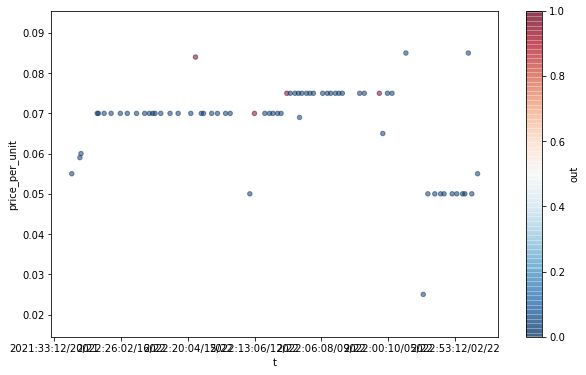

In [173]:
import matplotlib.pyplot as plt


from pandas import datetime

most_frequent_o  =dev_df[dev_df['outlier']]['CodProducto'].mode()[0]
most_frequent_o_data= dev_df[dev_df['CodProducto']==most_frequent_o]
most_frequent_o_data['t'] = most_frequent_o_data['FechaCesta'].astype(np.int64)
most_frequent_o_data['out'] = most_frequent_o_data['outlier'].astype(np.int64)


#colors=['red' if x else 'red' ] 

''''''
fig, ax = plt.subplots(figsize=(10,6))
most_frequent_o_data.plot.scatter(x='t', y='price_per_unit' ,c='out', cmap='RdBu_r',ax=ax)
#most_frequent_o_data.plot.scatter(x='t', y='price_per_unit' ,c='out', cmap='RdBu_r',ax=ax)

ax.set_xticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%Y:%M:%D') for ts in ax.get_xticks()])
#plt.show()
#most_frequent_o_data.plot(x='FechaCesta', y='price_per_unit', style='.')


In [167]:
most_frequent_o_data['outlier']


1004    False
1005    False
1006    False
1007    False
1008     True
        ...  
1453    False
1454    False
1455    False
1822    False
1882    False
Name: outlier, Length: 66, dtype: bool

In [426]:
cut_dates=dev_df['mode']
cut_dates

KeyError: 'mode'

[None]


/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: '<' not supported between instances of 'NoneType' and 'float'

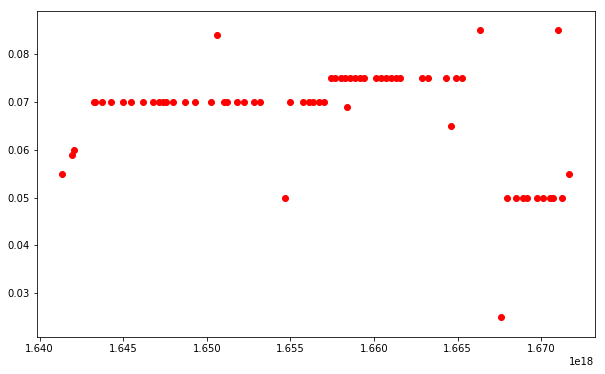

In [363]:
import matplotlib.pyplot as plt


cut_dates=dev_df['date'].unique()

most_frequent_o  =dev_df[dev_df['outlier']]['CodProducto'].mode()[0]
most_frequent_o_data= dev_df[dev_df['CodProducto']==most_frequent_o]
most_frequent_o_data['t'] = most_frequent_o_data['FechaCesta'].astype(np.int64)
normal = most_frequent_o_data[~ most_frequent_o_data['outlier']]
o = most_frequent_o_data[most_frequent_o_data['outlier']]

#colors=['red' if x else 'red' ] 

print(cut_dates)

''''''
fig, ax = plt.subplots(figsize=(10,6))
#most_frequent_o_data.plot.scatter(x='t', y='price_per_unit' ,c='out', cmap='RdBu_r',ax=ax)

ax.scatter(x=normal['t'],y=normal['price_per_unit'],color='blue')
ax.scatter(x=o['t'],y=o['price_per_unit'],color='red')
plt.axvline(x = cut_dates, color = 'b', label = 'axvline - full height')
a=[datetime.fromtimestamp(ts / 1e9).strftime('%Y-%m-%d') for ts in ax.get_xticks()]
print(a)
ax.set_xticklabels(a)


In [92]:
clean_data= dev_df.drop(dev_df[dev_df['outlier']].index).copy()

In [93]:
clean_data['outlier'].value_counts()

False    2997
Name: outlier, dtype: int64

In [94]:
dfupdate= clean_data.sample(100)
dfupdate['Precio']*=2
clean_data.update(dfupdate)


In [95]:
price_outlier(clean_data)

In [96]:
clean_data['outlier'].value_counts()

False    2997
Name: outlier, dtype: int64

In [98]:
clean_data['CodProducto'].value_counts().min()

1

In [104]:
date_code_value_counts = clean_data[['FechaCesta','CodProducto']].value_counts()

In [111]:
date_code_value_counts.loc[lambda x:x==1]

FechaCesta  CodProducto
2022-04-18  270048.0       1
            290364.0       1
            270052.0       1
            290568.0       1
            290631.0       1
                          ..
2022-09-07  59961.0        1
            52994.0        1
2022-09-05  947064.0       1
            938178.0       1
2022-01-03  1405.0         1
Length: 2965, dtype: int64

In [ ]:
# could be something like the traditional methods  (P < Q1-1.5IQR) OR (Q3+1.5IQR)>P

